### TextRank를 이용한 문서요약

#### TextRank 란?

TextRank는 Mihalcea(2004)이 제안한 알고리즘으로 텍스트에 관한 graph-based ranking model 로써, Google의 PageRank를 활용한 알고리즘이다. PageRank는Brin and Page(1998)이 제안한 알고리즘으로 하이퍼링크를 가지는 웹 문서에 상대적 중요도에 따라 가중치를 부여하는 방법이다. 서로간의 인용과 참조로 연결된 임의의 묶음에 적용할 수 있다.(wikipedia) PageRank가 높은 웹페이지는 다른 웹 사이트로 부터 링크를 받는다 즉 다른 사이트가 참조를 많이한것으로 해석할 수 있다. 예를 들어, 아래 그림의 Page A의 PageRank는 B,C,D 각각의 PageRank(PR)를 해당 B, C, D의 전체링크(L)로 나눈 값의 합으로 나타낼 수 있다. 아래의 식에서 d는 damping factor로 웹 서핑을 하는 사람이 해당 페이지를 만족하지 못하고 다른 페이지로 가는 링크를 클릭할 확률이다.

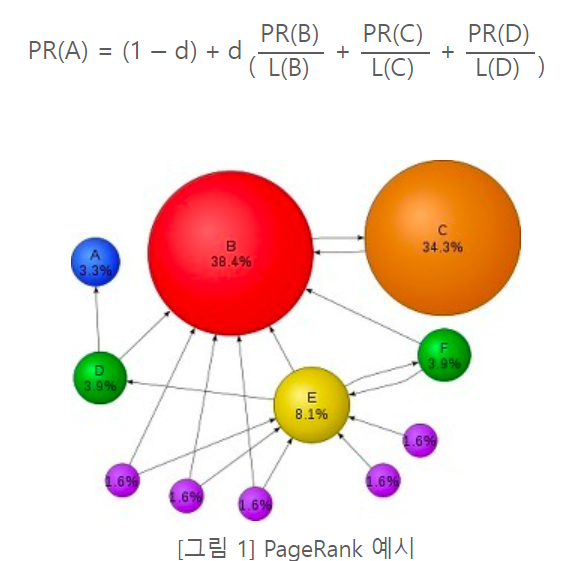

이러한 PageRank 알고리즘을 활용한 것이 바로 TextRank이다. TextRank는 PageRank의 중요도가 높은 웹 사이트는 다른 많은 사이트로 부터 링크를 받는다는 점에 착안하여 문서 내의 문장(or 단어)를 이용하여 문장의 Ranking을 계산하는 알고리즘이다.

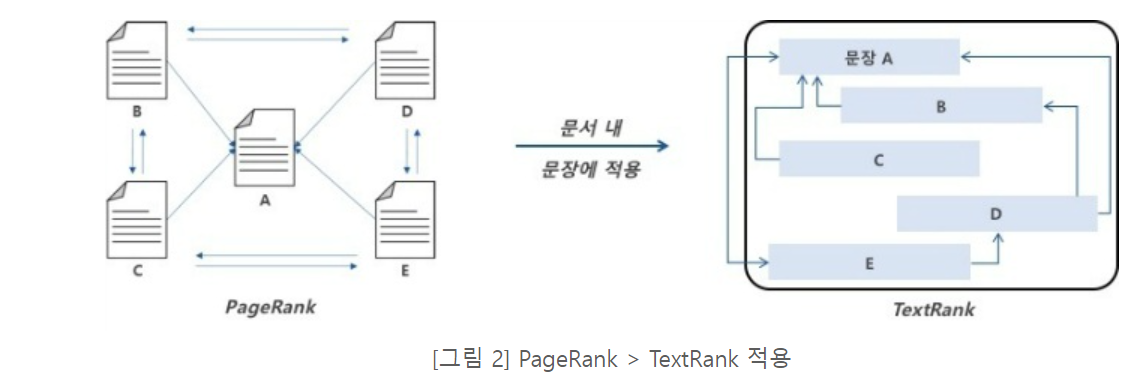

TextRank 식은 아래와 같다.

- TR(Vi): 문장 또는 단어(V)i에 대한 TextRank값
- wij: 문장 또는 단어 i 와 j 사이의 가중치
- d:dampingfactor, PageRank에서 웹 서핑을 하는 사람이 해당 페이지를 만족하지 못하고 다른페이지로 이동하는 확률로써, TextRank에서도 그 값을 그대로 사용(0.85로 설정)
- TextRank TR(Vi)를 계산 한 뒤 높은 순으로 정렬

#### TextRank 구현 해보기

TextRank를 적용하여 문서를 요약해주는 시스템을 구현 해본다. 전체 프로세스는 아래 그림3 과 같다.

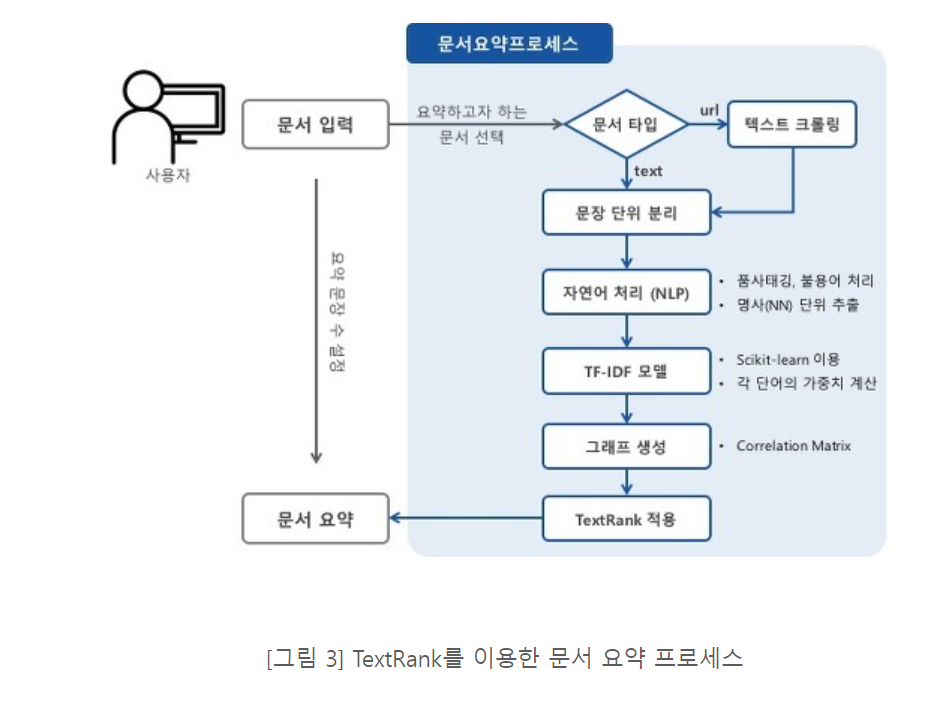

#### newspaper 설치

In [1]:
!pip install newspaper3k

#### newspaper 사용해보기

설치가 완료되었으면 이제 뉴스기사를 크롤링해보자.
newspaper모듈을 사용하여 기사를 가져오는 소스코드는 아래와 같다.

In [4]:
from newspaper import Article
#크롤링할 url 주소 입력
url = 'https://sports.v.daum.net/v/20220520163004900'
#언어가 한국어이므로 language='ko'로 설정
a = Article(url, language='ko')
a.download()
a.parse()
#기사 제목 가져오기
print(a.title)
#기사 내용 가져오기(150자)
print(a.text[:])

'원더골 메이커' 손흥민 '실착+사인' 유니폼, 경매가 미쳤다..'토트넘 1등'
[인터풋볼] 하근수 기자= 토트넘 훗스퍼가 지난 레스터 시티전에 착용했던 유니폼들을 자선 행사 경매장에 내놓았다. 원더골을 터뜨렸던 손흥민 유니폼은 토트넘 선수들 가운데에서도 단연 압도적이다.

토트넘은 19일(한국시간) 구단 SNS 계정을 통해 메인 스폰서이자 보험 그룹 'AIA 생명'과 함께 하는 유니폼 경매 자선 행사를 홍보했다. 토트넘은 지난 1일 2021-22시즌 잉글리시 프리미어리그(EPL) 35라운드 레스터전 동안 착용 및 사용했던 유니폼 총 44개를 등록한 다음 경매를 진행하고 있다.

이번 자선 행사는 '매치 원 셔츠'를 통해 구매할 수 있으며 종류도 많다. 실착 유니폼은 선수마다 하나밖에 없기에 비싼 값에 경매가 진행되고 있다. 반면 만일에 대비해 챙긴 여분 유니폼도 있는 만큼 팬들이 선택할 수 있는 옵션이 다양하다. 모든 유니폼에는 선수 친필 사인까지 새겨져 있어 가치가 더욱 크다.

레스터전은 그야말로 '손흥민 원맨쇼'였다. 치열한 신경전이 펼쳐지던 전반 22분 토트넘은 손흥민 코너킥을 헤더로 연결한 해리 케인 선제골로 앞서갔다. 후반전도 마찬가지였다. 후반 15분 교체 투입된 데얀 쿨루셉스키가 침투 패스를 건넸고, 기회를 놓치지 않은 손흥민이 침착히 밀어 넣으며 골망을 흔들었다.

원더골도 터졌다. 후반 34분 쿨루셉스키와 연계를 주고받은 손흥민이 다소 먼 거리였지만 과감하게 슈팅했다. 상단 구석으로 정확히 향한 볼은 그대로 쐐기골이 됐고, 토트넘 훗스퍼 스타디움에 있던 모두가 자리에서 일어날 만큼 엄청난 골이었다.

2골 1도움을 기록한 활약상이 반영된 것일까. 당시 손흥민이 실제 착용했던 유니폼은 20일 16시 기준 무려 호가 8,236 유로(약 1,104만 원)에 달한다. 해리 케인(5,829 유로, 약 781만 원), 크리스티안 로메로(2,359 유로, 약 316만 원), 위고 요리스(2,234 유로, 약 300만 원), 로드리고 벤탄쿠르(1,939 

In [5]:
from newspaper import Article
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Step 1. 문서 타입에 따른 문장 단위로 분리하기(텍스트 크롤링 > 문장 단위 분리 > 명사 추출)

1. 텍스트 크롤링

   현재, 구현하고자 하는 문서요약시스템은 사용자가 입력값을 url 혹은 text 2가지로 입력할 수 있게 구현할 것이  다. 사용자가 url을 입력했을 때, Step 0에서 설치한 newspaper 패키지를 이용하여 text를 크롤링한다.


2. 문장 단위 분리

   문장 단위로 분리하기 위해 여러가지 방법을 생각하던 중 KoNLPy 중 꼬꼬마(Kkma) 분석기 함수 중 문장을 추출하는 sentences()라는 함수를 이용하여 문장을 분리한다.


3. 명사 추출(POS-Tagging)

   TF-IDF 모델을 만들기 위한 전처리 과정으로 문장으로 분리 한 뒤 문장을 형태소 단위로 나눈 후 품사 태깅을 통해 명사들만 추출한다. KoNLPy 중 Twitter를 이용하여 명사를 추출해 준다.

#### SentenceTokenizer Class

[텍스트 크롤링, 문장 단위 분리, 명사 추출] 과정을 SentenceTokenizer 클래스로 만들었다.

- 아래의 코드에서 stopwords는 불용어로써 문장 내에서 내용을 나타내는데 의미를 가지지 않는 단어들의 집합을 의미한다. stopwords는 사용 목적에 맞게 적절히 추가, 삭제를 해주면 된다.


- url2sentences(url) : url 주소를 받아 기사내용(article.text)을 추출하여 Kkma.sentences()를 이용하여 문장단위로 나누어 준 후 senteces를 return 해 준다.


- text2sentences(text) : text(str)를 입력받아 Kkma.sentences()를 이용하여 문장단위로 나누어 준 후 senteces를 return 해 준다.


- get_nouns(sentences) : sentences를 받아 Twitter.nouns()를 이용하여 명사를 추출한 뒤 nouns를 return해 준다.

In [6]:
class SentenceTokenizer(object):
    def __init__(self):
        self.kkma = Kkma()
        self.twitter = Twitter()
        self.stopwords = ['중인' ,'만큼', '마찬가지', '꼬집었', "연합뉴스", "데일리", "동아일보", "중앙일보", "조선일보", "기자"
    ,"아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가",]

    def url2sentences(self, url):
        article = Article(url, language='ko')
        article.download()
        article.parse()
        sentences = self.kkma.sentences(article.text)
        for idx in range(0, len(sentences)):
            if len(sentences[idx]) <= 10:
                sentences[idx-1] += (' ' + sentences[idx])
                sentences[idx] = ''
        return sentences

    def text2sentences(self, text):
        sentences = self.kkma.sentences(text)
        for idx in range(0, len(sentences)):
            if len(sentences[idx]) <= 10:
                sentences[idx-1] += (' ' + sentences[idx])
                sentences[idx] = ''
        return sentences

    def get_nouns(self, sentences):
        nouns = []
        for sentence in sentences:
            if sentence is not '':
                nouns.append(' '.join([noun for noun in self.twitter.nouns(str(sentence))
                if noun not in self.stopwords and len(noun) > 1]))
        return nouns

#### Step 2. TF-IDF 모델 생성 및 그래프 생성

1. TF-IDF

   TF-IDF(Term Frequency - Inverse Document Frequency)는 정보 검색(Information Retrieval)과 텍스트 마이닝에서 사용하는 단어의 상대적인 가중치이다. 여러 문서로 이루어진 문서 군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치이다. 자세한 내용은 Wikipedia에서 확인할 수 있다.
   
- TF(Term Frequency) : 단어 빈도, 특정 단어가 문서 내에 얼만큼의 빈도로 등장하는지를 나타내는 척도


- IDF(Inverse Document Frequency) : 역문헌 빈도수, 문서 빈도의 역수로써 전체 문서 개수를 해당 단어가 포함된 문서의 개수로 나눈 것을 의미한다.


- TF-IDF 식 : Wi,j=tfi,j×log(N/dfi)
  TF-IDF를 계산하기 위해 Python의 머신러닝 패키지인 Scikit-learn을 이용하여 TF-IDF모델링을 수행한다. TF-IDF를 구하고 난 뒤 그래프를 생성하기 위해 Sentence - Term Matrix(원래는 Document-Term Matrix)를 아래의 그림4 처럼 생성한다.

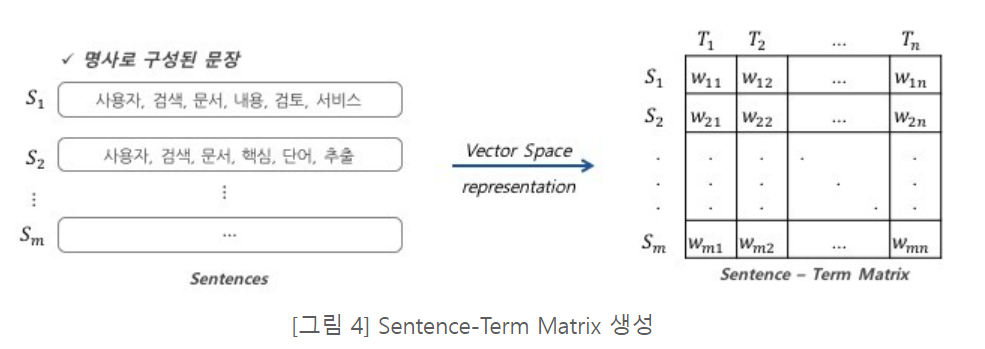

2. 그래프 생성
   Sentence-Term Matrix를 이용하여 전치행렬을 구한뒤 서로 곱해준다. 즉, Correlation Matrix 를 생성한다. 이렇게 생성한 Correlation Matrix를 Graph의 Adjancey Matrix로 생각해 줄 수 있다. (Correlation Matrix의 대각행렬 원소 1을 0으로 치환 해줘야함) 따라서, 아래 그림5 처럼 Correlation Matrix를 통해 문장(or 단어) 간의 가중치 그래프(Weighted graph)로 나타낼 수 있다.

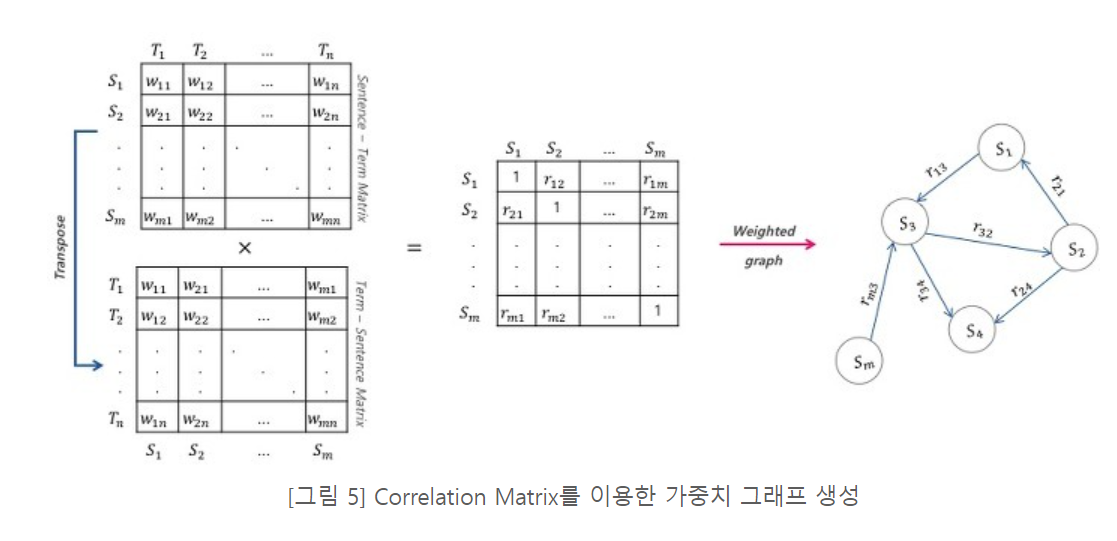

**GrpahMatrix Class**

[TF-IDF 모델, 그래프 생성] 과정을 GraphMatrix 클래스로 구현했다.

- build_sent_graph(sentence) : 명사로 이루어진 문장을 입력받아 sklearn의 TfidfVectorizer.fit_transform을 이용하여 tfidf matrix를 만든 후 Sentence graph를 return 한다.


- build_words_grahp(sentnece) : 명사로 이루어진 문장을 입력받아 sklearn의 CountVectorizer.fit_transform을 이용하여 matrix를 만든 후 word graph와 {idx: word}형태의 dictionary를 return한다.

In [39]:
class GraphMatrix(object):
    def __init__(self):
        self.tfidf = TfidfVectorizer()
        self.cnt_vec = CountVectorizer()
        self.graph_sentence = []
        
    def build_sent_graph(self, sentence):
        tfidf_mat = self.tfidf.fit_transform(sentence).toarray()
        self.graph_sentence = np.dot(tfidf_mat, tfidf_mat.T)
        return self.graph_sentence
    
    def build_words_graph(self, sentence):
        cnt_vec_mat = normalize(self.cnt_vec.fit_transform(sentence).toarray().astype(float), axis=0)
        vocab = self.cnt_vec.vocabulary_
        return np.dot(cnt_vec_mat.T, cnt_vec_mat), {vocab[word] : word for word in vocab}

#### Step 3. TextRank 알고리즘 적용

이제 드디어, TextRank 알고리즘을 구현하는 단계이다.
앞에서 생성된 문장(or 단어)의 가중치 그래프를 이용하여 TextRank 알고리즘을 적용한다. TextRank 알고리즘을 통해 Ranking값이 높은 순으로 정렬한 뒤 요약할 문장(or 단어)의 개수 만큼 출력 해준다.

**Rank class**

TextRank 알고리즘을 구현한 클래스이다.

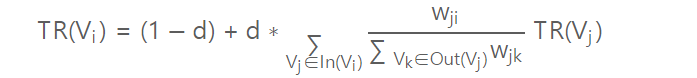

- get_ranks(graph): 위의 식을 구현한 부분이며, {idx : rank 값} 형태의 dictionary를 return 한다.

- spookyQubit/TextRank 를 참고함

In [8]:
# x0 + 2*x1 = 1
# 3*x0 + 5*x1 = 2

a = np.array([[1,2],
              [3,5]])
b = np.array([1,2])    # np.dot(a,x) => b
x = np.linalg.solve(a,b) #  (2,2)(2,) => (2,)
x

array([-1.,  1.])

In [24]:
a = np.array([1,2])
a = a.astype(float)
a /= 2
print(a)

[0.5 1. ]


In [35]:
class Rank(object):
    def get_ranks(self, graph, d=0.85): # d = damping factor
        A = graph
        matrix_size = A.shape[0]
        for id in range(matrix_size):
            A[id, id] = 0 # diagonal 부분을 0으로
            link_sum = np.sum(A[:,id]) # A[:, id] = A[:][id]
#             print(link_sum)
#             print(A[:, id])
            if link_sum != 0:
                A[:, id] /= link_sum 
            A[:, id] *= -d
            A[id, id] = 1
            
        B = (1-d) * np.ones((matrix_size, 1))
        ranks = np.linalg.solve(A, B) # 연립방정식 Ax = b
        return {idx: r[0] for idx, r in enumerate(ranks)}

In [34]:
rank = Rank()
graph = np.array([[0,0,1,0,2],
                  [1,0,0,2,0],
                  [0,0,0,0,0],
                  [0,1,0,0,2],
                  [3,0,3,0,0]], dtype=float)
ret = rank.get_ranks(graph)
ret

{0: 0.3926489498499786,
 1: 1.9462910242003675,
 2: 0.15000000000000002,
 3: 2.015121320420291,
 4: 0.4959387055293614}

#### Step 4. TextRank Class 구현

Step1 ~ Step3 까지의 클래스를 조합하여 TextRank 클래스를 구현했다. 사용자는 이 TextRank class를 이용하여 문서의 요약 또는 키워드들을 확인한다.

- summarize(sent_num=3): Default로 3줄 요약 가능하게 구현했다.

- keywords(word_num=10): Default로 10개의 키워드를 출력하도록 구현했다.

In [37]:
class TextRank(object):
    def __init__(self, text):
        self.sent_tokenize = SentenceTokenizer()
        
        if text[:5] in ('http:', 'https'):
            self.sentences = self.sent_tokenize.url2sentences(text)
        else:
            self.sentences = self.sent_tokenize.text2sentences(text)
            
        self.nouns = self.sent_tokenize.get_nouns(self.sentences)
        self.graph_matrix = GraphMatrix()
        self.sent_graph = self.graph_matrix.build_sent_graph(self.nouns)
        self.words_graph, self.idx2word = self.graph_matrix.build_words_graph(self.nouns)
        self.rank = Rank()
        self.sent_rank_idx = self.rank.get_ranks(self.sent_graph)
        self.sorted_sent_rank_idx = sorted(self.sent_rank_idx, key=lambda k: self.sent_rank_idx[k], reverse=True)
        self.word_rank_idx = self.rank.get_ranks(self.words_graph)
        self.sorted_word_rank_idx = sorted(self.word_rank_idx, key=lambda k: self.word_rank_idx[k], reverse=True)

    def summarize(self, sent_num=3):
        summary = []
        index=[]
        for idx in self.sorted_sent_rank_idx[:sent_num]:
            index.append(idx)
            
        index.sort()
        for idx in index:
            summary.append(self.sentences[idx])
        return summary
    
    def keywords(self, word_num=10):
        rank = Rank()
        rank_idx = rank.get_ranks(self.words_graph)
        sorted_rank_idx = sorted(rank_idx, key=lambda k: rank_idx[k], reverse=True)
        keywords = []
        index=[]
        for idx in sorted_rank_idx[:word_num]:
            index.append(idx)
        
        #index.sort()
        for idx in index:
            keywords.append(self.idx2word[idx])
        
        return keywords

#### Step 5. 결과 확인

In [42]:
# url = 'http://v.media.daum.net/v/20170611192209012?rcmd=r'
url = 'https://sports.v.daum.net/v/20220520175759416'
textrank = TextRank(url)
print(textrank.sentences)
for row in textrank.summarize(3):
    print(row)
    print()
print('keywords :',textrank.keywords())

['( 엑 스포츠 뉴스 김정현 기자) 안토니 오 콘 테 감독이 이탈리아에서 지도해 재미를 봤던 어린 중앙 수비수 영입을 노린다.', '이탈리아 언론 코리 엘레 델 로 스포르트는 20일( 한국시간) 토트 넘 홋스퍼가 인테르의 중앙 수비수 알 레 산 드로 바 스토니 (23) 영입을 위해 진지하고 중요한 제안을 할 예정이라고 전했다.', '언론은 " 안토니 오 콘 테 감독이 수비 강화를 최우선으로 삼았다.', '그는 바 스토니를 영입 대상 중 하나로 고려하고 있다.', '콘 테 감독은 2019년 인테르 부임 후 그를 세 달 만에 주전 수비수로 낙점했었다.', '" 라며 콘 테 감독의 영입 의지를 밝혔다.', '그러면서 " 토트 넘이 4위 경쟁에서 승리해 UEFA( 유럽축구연맹) 챔피언 스리 그 진출권을 확보하면 영입 작업은 생각하기 더 쉬워 진다.', '콘 테 감독은 바 스토니를 런던에서 기다리고 있고 파 비오 파라 티치 단장에게 공격적으로 영입을 추진 하라고 주문할 것이다. "라고 전했다.', '', '190cm 의 장 신인 바 스토니는 지난 2017년 여름, 아 탈란타에서 3110만 유로( 약 416억원) 의 이적료를 기록하며 인테르로 이적했다.', '바로 한 시즌 동안 아 탈란타 재임대와 파르마 임대를 거쳐 2019/20 시즌부터 인테르에서 뛰기 시작한 그는 콘 테 감독 부임과 함께 주전 수비 자원으로 거듭났다.', '바 스토니는 인테르에서 세 시즌 동안 공식전 117 경기에 출장했고 이때의 활약을 바탕으로 이탈리아 대표팀에 선발되기도 했다.', '2021/22 시즌엔 세리에 A 30 경기, 2,261분을 출장했고 공식전 43 경기 3,266분을 뛰었다.', '토트 넘은 지난 여름 이적시장에 아 탈란타에서 세리에 A 최고 수비수로 평가 받은 크리스 티 안 로 메로를 영입했고 부상 기간을 제외하고 최고의 활약을 펼치며 성공적인 영입으로 평가하고 있다.', '수비 강화를 노리는 콘 테 감독은 자신이 활용했던 어린 유망주 수비수를 한 번 더 영입해 효과를 보려 하고

이상으로 TextRank를 직접 구현하여 문서요약시스템을 만들어 보았다. 전처리 과정에서 불용어 처리나, 품사태깅에 대한 부족한 부분이 있지만 직접 구현해보는것 자체가 큰 의미가 있는거 같다. 현재 gensim을 비롯한 다양한 패키지들이 TextRank알고리즘을 활용하여 문서를 요약해주고 있다. 역시 코딩은 있는거 잘 가져다 쓰는 것이 최고인거 같다.